# Import Libraries

In [13]:
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data

In [2]:
path = './Data/Models'
temp_list = os.listdir(path=path)
temp_list

['CNN_metrics_V1.csv',
 'CNN_metrics_V2.csv',
 'CNN_metrics_V3.csv',
 'CNN_metrics_V4.csv',
 'CNN_metrics_V5.csv',
 'CNN_metrics_V6.csv',
 'CNN_V1.keras',
 'CNN_V2.keras',
 'CNN_V3.keras',
 'CNN_V4.keras',
 'CNN_V5.keras',
 'CNN_V6.keras',
 'mobilenet.csv',
 'mobilenet.keras',
 'mobilenetV2.csv',
 'mobilenetV2.keras']

In [3]:
metrics_list = [file for file in temp_list if '.csv' in file]
metrics_list

['CNN_metrics_V1.csv',
 'CNN_metrics_V2.csv',
 'CNN_metrics_V3.csv',
 'CNN_metrics_V4.csv',
 'CNN_metrics_V5.csv',
 'CNN_metrics_V6.csv',
 'mobilenet.csv',
 'mobilenetV2.csv']

# Reading Metrics Files

In [4]:
for metrics in metrics_list:
  globals()[metrics.replace('.csv', '')] = pd.read_csv(filepath_or_buffer = (path + '/' + metrics), index_col=0)

  print( [key for key in globals().keys() if key == metrics.replace('.csv', '')][0] )
  display(globals()[metrics.replace('.csv', '')].head())
  print('\n')

CNN_metrics_V1


,loss,accuracy,val_loss,val_accuracy
0,0.569081,0.721025,0.410600,0.800464
1,0.359420,0.851485,0.365309,0.828306
2,0.320194,0.860221,0.364965,0.849188
3,0.284107,0.880606,0.326951,0.860789
4,0.275113,0.881771,0.333411,0.863109




CNN_metrics_V2


,loss,accuracy,val_loss,val_accuracy
0,0.559904,0.749563,0.402657,0.802784
1,0.361344,0.841584,0.380269,0.812065
2,0.326188,0.857309,0.385544,0.819026
3,0.303807,0.866628,0.373145,0.830626
4,0.277527,0.877694,0.350038,0.867749




CNN_metrics_V3


,loss,accuracy,val_loss,val_accuracy
0,0.471612,0.772860,0.402987,0.805104
1,0.347777,0.848573,0.365056,0.839907
2,0.316518,0.866628,0.364742,0.844548
3,0.288537,0.875364,0.344746,0.849188
4,0.267873,0.891089,0.332353,0.863109




CNN_metrics_V4


,loss,accuracy,val_loss,val_accuracy
0,0.442307,0.792079,0.465240,0.814385
1,0.348777,0.843914,0.361451,0.835267
2,0.312408,0.856727,0.356043,0.849188
3,0.283600,0.875364,0.428367,0.802784
4,0.282384,0.879441,0.333687,0.870070




CNN_metrics_V5


,loss,accuracy,val_loss,val_accuracy
0,0.424831,0.807804,3.220995,0.431555
1,0.321555,0.866045,0.327869,0.858469
2,0.281513,0.885847,1.558576,0.508121
3,0.245122,0.900408,0.409196,0.812065
4,0.237922,0.904485,0.823579,0.693735




CNN_metrics_V6


,loss,accuracy,val_loss,val_accuracy
0,0.494074,0.762959,0.445630,0.798144
1,0.376686,0.824694,0.370430,0.832947
2,0.333951,0.850320,0.348431,0.830626
3,0.332574,0.849738,0.335362,0.846868
4,0.319880,0.854980,0.338808,0.844548




mobilenet


,loss,accuracy,val_loss,val_accuracy
0,0.661222,0.812464,3.159183,0.426914
1,0.317538,0.888759,3.185585,0.440835
2,0.184722,0.920210,0.345895,0.860789
3,0.155133,0.947583,0.447627,0.812065
4,0.126300,0.953407,0.235099,0.895592




mobilenetV2


,loss,accuracy,val_loss,val_accuracy
0,0.465321,0.796156,32.531376,0.426914
1,0.275957,0.897496,30.171217,0.426914
2,0.184117,0.928363,37.864460,0.426914
3,0.138689,0.944671,28.150694,0.426914
4,0.091623,0.963308,28.140648,0.429234


# Plotting

## Loss

In [5]:
metrics_list = [file.replace('.csv', '') for file in metrics_list]

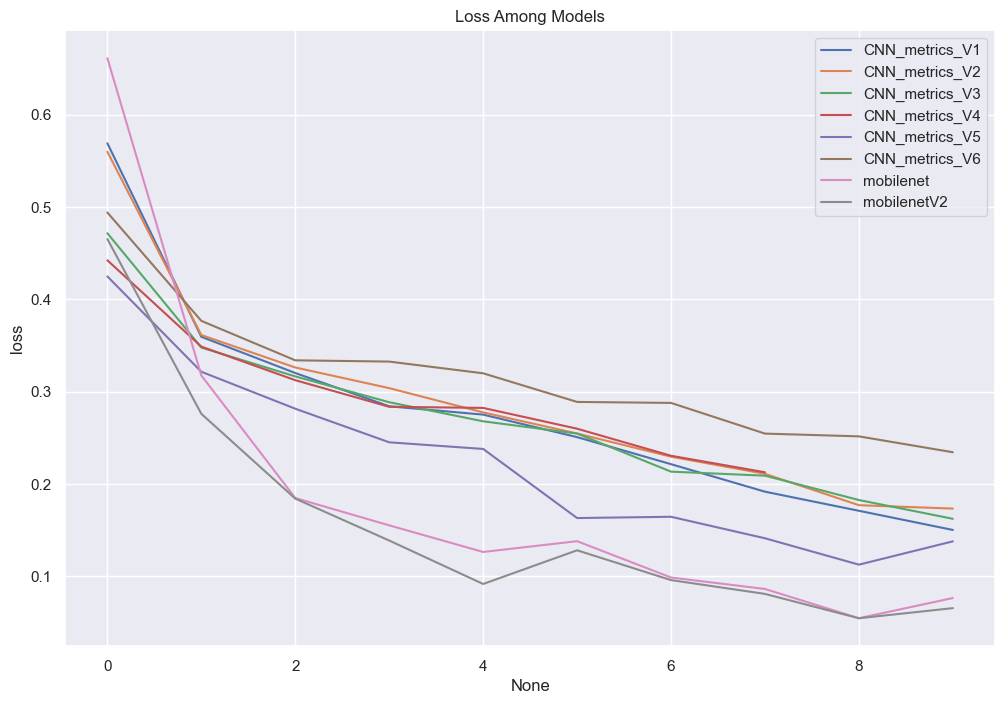

In [6]:
for file in metrics_list:
  sns.set(rc={'figure.figsize': (12,8)})
  sns.lineplot(data=globals()[file], x=globals()[file].index, y='loss', label=file).set(title='Loss Among Models')

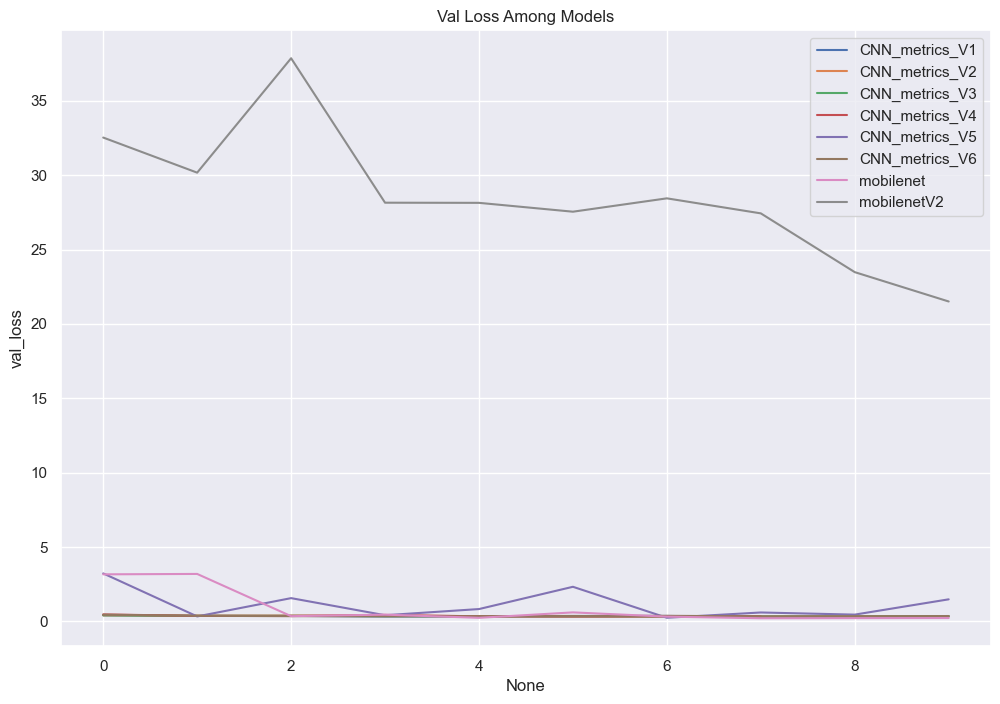

In [7]:
for file in metrics_list:
  sns.set(rc={'figure.figsize': (12,8)})
  sns.lineplot(data=globals()[file], x=globals()[file].index, y='val_loss', label=file).set(title='Val Loss Among Models')

## Accuracy

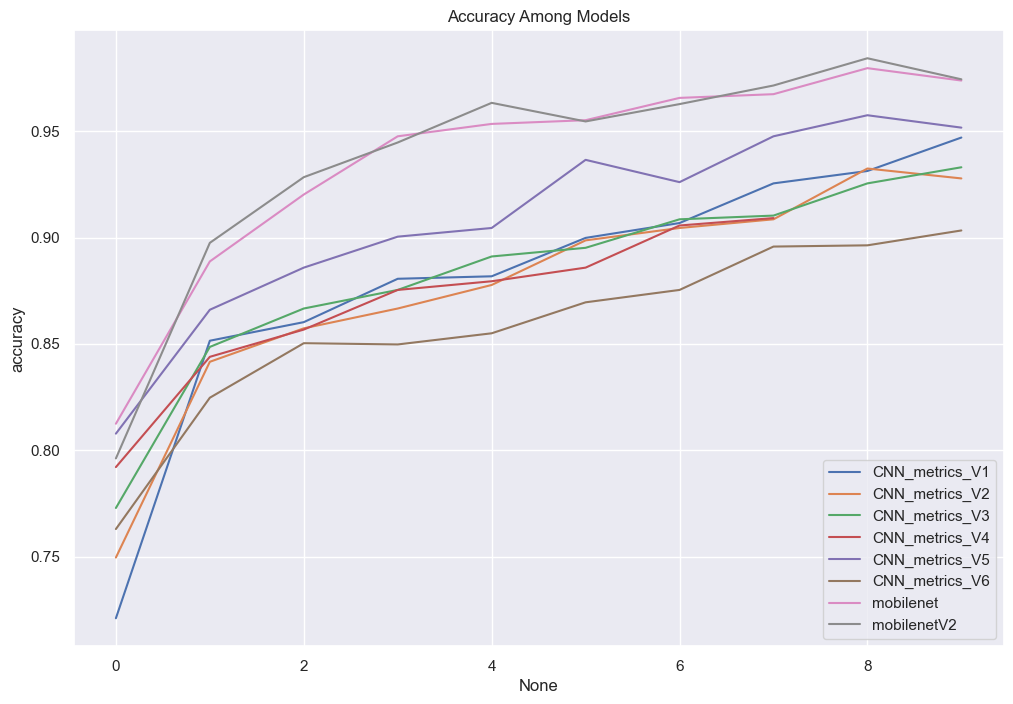

In [8]:
for file in metrics_list:
  sns.set(rc={'figure.figsize': (12,8)})
  sns.lineplot(data=globals()[file], x=globals()[file].index, y='accuracy', label=file).set(title='Accuracy Among Models')

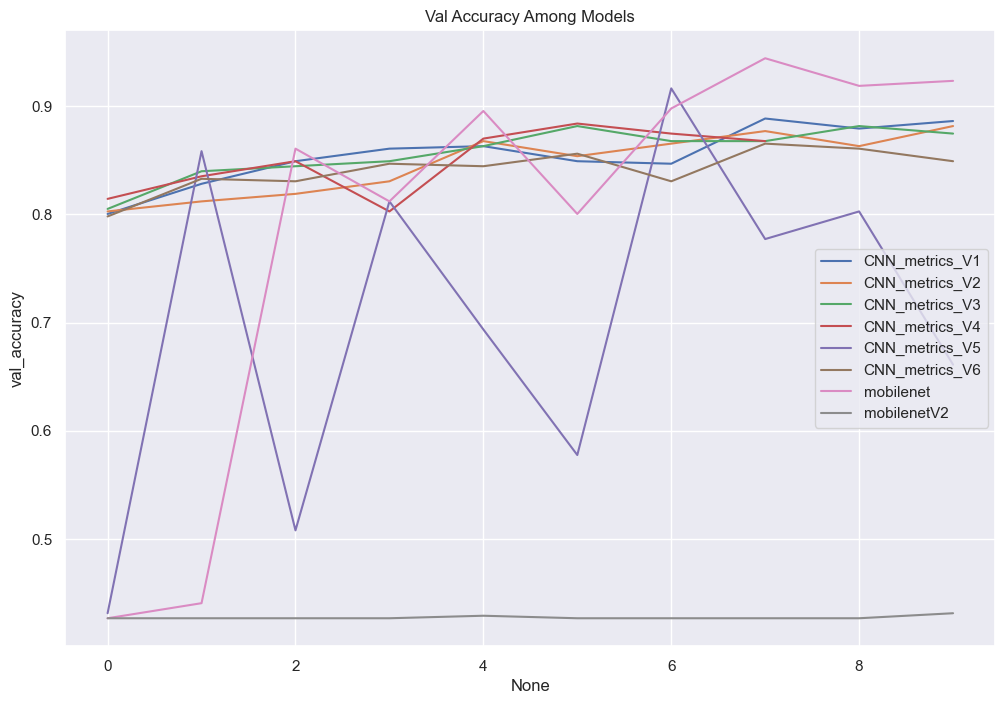

In [9]:
for file in metrics_list:
  sns.set(rc={'figure.figsize': (12,8)})
  sns.lineplot(data=globals()[file], x=globals()[file].index, y='val_accuracy', label=file).set(title='Val Accuracy Among Models')

# Reading Models

In [10]:
models_list = [file for file in temp_list if '.keras' in file]
models_list

['CNN_V1.keras',
 'CNN_V2.keras',
 'CNN_V3.keras',
 'CNN_V4.keras',
 'CNN_V5.keras',
 'CNN_V6.keras',
 'mobilenet.keras',
 'mobilenetV2.keras']

In [11]:
for model in models_list:
  globals()[model.replace('.keras', '')] = tf.keras.models.load_model(filepath=('./Data/Models/' + model))

# Reading Validation Images

In [14]:
IDG = ImageDataGenerator(rescale=(1/255))

val = IDG.flow_from_directory(directory='./Data/val',
                              target_size=(50,50),
                              color_mode='rgb',
                              class_mode='binary',
                              batch_size=32,
                              shuffle=True,
                              seed=42)

Found 431 images belonging to 2 classes.
